In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob 

In [44]:
data_path = "data"

In [45]:
all_csv_files = glob.glob(f'{data_path}/*y.csv')

In [46]:
all_csv_files

['data/thursday.csv',
 'data/friday.csv',
 'data/wednesday.csv',
 'data/monday.csv',
 'data/tuesday.csv']

In [47]:
df = pd.read_csv('data/monday.csv', parse_dates = True, delimiter = ';')

In [48]:
df

,timestamp,customer_no,location
0,2019-09-02 07:03:00,1,dairy
1,2019-09-02 07:03:00,2,dairy
2,2019-09-02 07:04:00,3,dairy
3,2019-09-02 07:04:00,4,dairy
4,2019-09-02 07:04:00,5,spices
...,...,...,...
4879,2019-09-02 21:49:00,1442,checkout
4880,2019-09-02 21:49:00,1444,checkout
4881,2019-09-02 21:49:00,1445,dairy
4882,2019-09-02 21:50:00,1446,dairy


In [49]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['weekday'] = df['timestamp'].dt.weekday

In [50]:
df

,timestamp,customer_no,location,hour,weekday
0,2019-09-02 07:03:00,1,dairy,7,0
1,2019-09-02 07:03:00,2,dairy,7,0
2,2019-09-02 07:04:00,3,dairy,7,0
3,2019-09-02 07:04:00,4,dairy,7,0
4,2019-09-02 07:04:00,5,spices,7,0
...,...,...,...,...,...
4879,2019-09-02 21:49:00,1442,checkout,21,0
4880,2019-09-02 21:49:00,1444,checkout,21,0
4881,2019-09-02 21:49:00,1445,dairy,21,0
4882,2019-09-02 21:50:00,1446,dairy,21,0


In [51]:
df['weekday'].unique()

array([0])

# Calculate the total number of customers in each section

In [52]:
df_l = df.groupby('location')['customer_no']


In [53]:
for i,j in df_l:
    print(i)
    print(j)

checkout
8          1
9          5
12         2
13         3
20         8
        ... 
4864    1438
4869    1431
4871    1434
4879    1442
4880    1444
Name: customer_no, Length: 1437, dtype: int64
dairy
0          1
1          2
2          3
3          4
10         6
        ... 
4865    1441
4868    1430
4873    1443
4881    1445
4882    1446
Name: customer_no, Length: 895, dtype: int64
drinks
11         7
16        11
21        12
39        20
43        19
        ... 
4852    1436
4857    1434
4861    1440
4870    1433
4872    1441
Name: customer_no, Length: 797, dtype: int64
fruit
7          8
15        10
19        14
27        15
32         7
        ... 
4866    1442
4867    1443
4875    1430
4876    1433
4883    1447
Name: customer_no, Length: 1005, dtype: int64
spices
4          5
5          6
6          7
17        12
22        15
        ... 
4856    1433
4859    1438
4874    1444
4877    1440
4878    1441
Name: customer_no, Length: 750, dtype: int64


In [54]:
df_l.get_group('dairy')

0          1
1          2
2          3
3          4
10         6
        ... 
4865    1441
4868    1430
4873    1443
4881    1445
4882    1446
Name: customer_no, Length: 895, dtype: int64

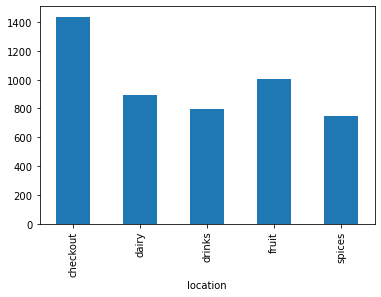

In [55]:
df_l.count().plot.bar();

# Calculate the total number of customers in each section over time

In [56]:
df1= df.groupby(['weekday','location'])['customer_no'].count()

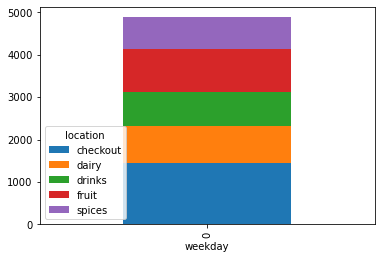

In [57]:
df1.unstack().plot.bar(stacked= True);

# Display the number of customers at checkout over time

In [58]:
df2 = df.groupby(['location','hour'])['customer_no'].count().reset_index()
df2

,location,hour,customer_no
0,checkout,7,92
1,checkout,8,112
2,checkout,9,85
3,checkout,10,90
4,checkout,11,55
...,...,...,...
70,spices,17,50
71,spices,18,70
72,spices,19,59
73,spices,20,52


In [59]:
df3 = df.groupby(['weekday','hour'])['customer_no'].count().reset_index()
df3

,weekday,hour,customer_no
0,0,7,317
1,0,8,364
2,0,9,308
3,0,10,282
4,0,11,189
5,0,12,265
6,0,13,412
7,0,14,305
8,0,15,342
9,0,16,307


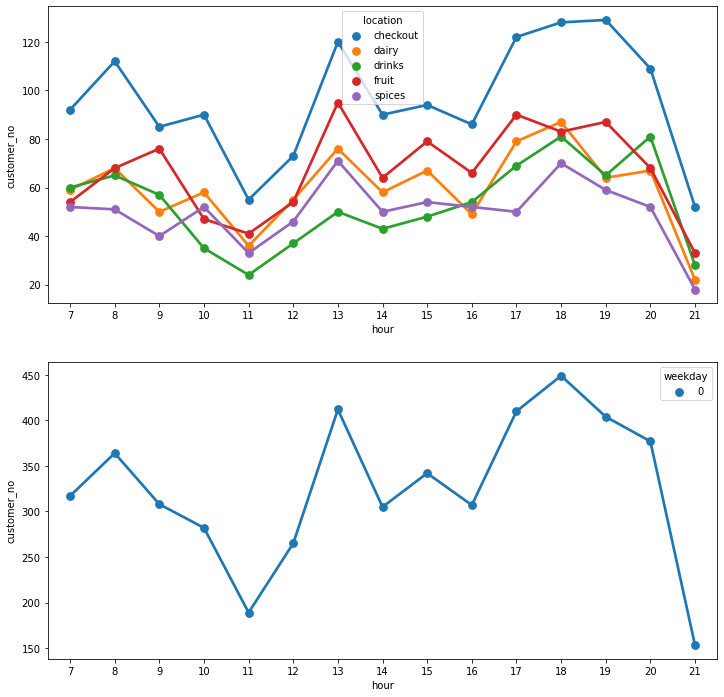

In [60]:
plt.figure(figsize = (12,12))

plt.subplot(2,1,1)
sns.pointplot(data = df2, x = df2['hour'], y = df2['customer_no'], hue = df2['location'], join = True);

plt.subplot(2,1,2)
sns.pointplot(data = df3, x = df3['hour'], y = df3['customer_no'], hue = df3['weekday'], join = True);

# Calculate the time each customer spent in the market

In [61]:
df_in = df.sort_values('customer_no').groupby(['customer_no', 'weekday'])['timestamp'].max()
df_out = df.sort_values('customer_no').groupby(['customer_no', 'weekday'])['timestamp'].min()

In [62]:
time_spent = df_in - df_out


In [63]:
time_spent

customer_no  weekday
1            0         0 days 00:02:00
2            0         0 days 00:03:00
3            0         0 days 00:02:00
4            0         0 days 00:04:00
5            0         0 days 00:01:00
                             ...      
1443         0         0 days 00:01:00
1444         0         0 days 00:01:00
1445         0         0 days 00:00:00
1446         0         0 days 00:00:00
1447         0         0 days 00:00:00
Name: timestamp, Length: 1447, dtype: timedelta64[ns]